# Interval constraint propagation

Encontrar conjunto $x^2 + y^2 \le 1$ en el plano

Want $\{(x, y): x^2 + y^2 \le 1 \}$

In [1]:
using IntervalArithmetic

In [2]:
x = y = -∞..∞

[-∞, ∞]

In [3]:
x = 1..2

[1, 2]

In [4]:
typeof(x)

Interval{Float64}

In [5]:
x^2

[1, 4]

In [6]:
x = y = -∞..∞

[-∞, ∞]

In [7]:
x^2

[0, ∞]

In [8]:
X = x × y

[-∞, ∞] × [-∞, ∞]

In [9]:
import Pkg; Pkg.add("TreeView")

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  100.0 %                         ]  36.3 %Fetching: [======================>                  ]  54.5 %>          ]  72.6 %   ]  91.6 %Fetching: [=======================================> ]  96.8 %Fetching: [=======================================> ]  97.4 %

  Resolving package versions...
julia version requirement for package `BibTeXFormat [81872a04]` not satisfied
julia version requirement for package `BibTeXFormat [81872a04]` not satisfied
julia version requirement for package `BibTeXFormat [81872a04]` not satisfied
julia version requirement for package `BibTeXFormat [81872a04]` not satisfied


LoadError: Unsatisfiable requirements detected for package ReachabilityAnalysis [1e97bd63]:
 ReachabilityAnalysis [1e97bd63] log:
 ├─possible versions are: 0.8.0 or uninstalled
 ├─ReachabilityAnalysis [1e97bd63] is fixed to version 0.8.0
 └─restricted to versions 0.7 by ReachabilityModels [20aa409e] — no versions left
   └─ReachabilityModels [20aa409e] log:
     ├─possible versions are: 0.1.0 or uninstalled
     └─ReachabilityModels [20aa409e] is fixed to version 0.1.0

In [10]:
using TreeView

┌ Info: Precompiling TreeView [39424ebd-4cf3-5550-a685-96706a953f40]
└ @ Base loading.jl:1278


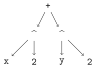

In [11]:
@tree x^2 + y^2

In [12]:
a = x^2

[0, ∞]

In [13]:
b = y^2

[0, ∞]

In [14]:
c = a + b  # c(x, y) = x^2 + y^2   #  {(x, y): c(x, y) ≤ 1}

[0, ∞]

In [15]:
using ModelingToolkit


In [16]:
@variables xx, yy

(xx, yy)

In [17]:
cc(x, y) = x^2 + y^2

cc (generic function with 1 method)

In [18]:
ex = cc(xx, yy)

xx ^ 2 + yy ^ 2

In [19]:
typeof(ex)

Operation

In [20]:
dump(ex)

Operation
  op: + (function of type typeof(+))
  args: Array{Expression}((2,)) Expression[xx ^ 2, yy ^ 2]


In [21]:
ex.op

+ (generic function with 380 methods)

In [22]:
ex2 = ex.args[1]

xx ^ 2

In [23]:
typeof(ex2)

Operation

In [24]:
constraint = -Inf..1

[-∞, 1]

In [25]:
cc(x, y) = x^2 + y^2

cc (generic function with 1 method)

$cc^{-1}([0, 1])$

In [26]:
c′ = c ∩ constraint

[0, 1]

In [27]:
# c = a + b;   ∴ a = c - b

In [28]:
a

[0, ∞]

In [29]:
c - b

[-∞, ∞]

In [30]:
c′ - b

[-∞, 1]

In [31]:
a, c′ - b

([0, ∞], [-∞, 1])

In [32]:
a′ = a ∩ (c′ - b)

[0, 1]

In [33]:
# a = x^2   ∴ x = √a ∪ -√a

In [34]:
s = √(a′)

x′ = x ∩ (s ∪ -s)

[-1, 1]

Set $x^2 + y^2 <=1 $ is contained inside $[-1, 1]^2$ -- theorem

In [35]:
using IntervalConstraintProgramming

┌ Info: Precompiling IntervalConstraintProgramming [138f1668-1576-5ad7-91b9-7425abbf3153]
└ @ Base loading.jl:1278


In [36]:
C = @constraint x^2 + y^2 < 1

Separator:
  - variables: x, y
  - expression: x ^ 2 + y ^ 2 ∈ [-∞, 1]

In [37]:
Base.remove_linenums!(C.contractor.forward.code)

quote
    t->begin
            (x, y) = t
            begin
                _a = x ^ 2
                _b = y ^ 2
                _c = _a + _b
            end
            return (_c, (_a, _b))
        end
end

In [38]:
Base.remove_linenums!(C.contractor.backward.code)

quote
    (t1, t2, t3)->begin
            (x, y) = t1
            (_c,) = t2
            (_a, _b) = t3
            begin
                (_c, _a, _b) = plus_rev(_c, _a, _b)
                (_b, y, _) = power_rev(_b, y, 2)
                (_a, x, _) = power_rev(_a, x, 2)
            end
            return (x, y)
        end
end

$+^{-1}([1, 2])$

In [39]:
using IntervalContractors

LoadError: ArgumentError: Package IntervalContractors not found in current path:
- Run `import Pkg; Pkg.add("IntervalContractors")` to install the IntervalContractors package.


In [40]:
@edit plus_rev(1..2, 3..4, 5..6)

LoadError: UndefVarError: plus_rev not defined

In [41]:
X = IntervalBox(-10..10, 2)

[-10, 10] × [-10, 10]

In [42]:
C(IntervalBox(X))

([-1, 1] × [-1, 1], [-10, 10] × [-10, 10])

In [43]:
C = @constraint x^2 + y^2 <= 1

Separator:
  - variables: x, y
  - expression: x ^ 2 + y ^ 2 ∈ [-∞, 1]

In [44]:
X = IntervalBox(-10..10, 2)

[-10, 10] × [-10, 10]

In [45]:
C(X)

([-1, 1] × [-1, 1], [-10, 10] × [-10, 10])

In [46]:
using Plots

In [47]:
X = IntervalBox(-2..2, 2)

[-2, 2] × [-2, 2]

In [48]:
p = pave(C, IntervalBox(-2..2, 2), 0.1)

Paving:
- tolerance ϵ = 0.1
- inner approx. of length 92
- boundary approx. of length 96

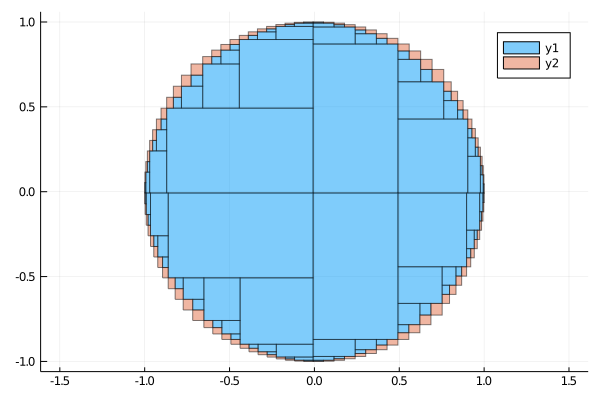

In [49]:
plot(p.inner, lw=1, ratio=1)
plot!(p.boundary, lw=1, ratio=1)

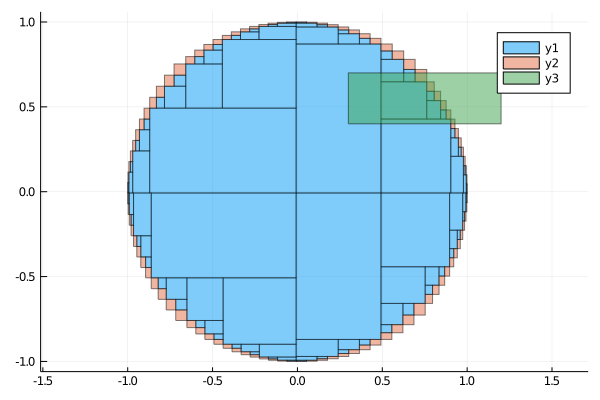

In [50]:
X = IntervalBox(0.3..1.2, 0.4..0.7)
plot!(X)

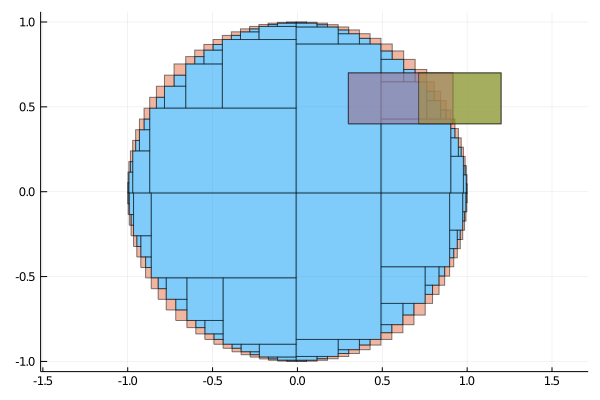

In [51]:
plot!(C(X)[1], leg=false)
plot!(C(X)[2])

In [52]:
C = @constraint -1 <= x + y <= 1

Separator:
  - variables: x, y
  - expression: x + y ∈ [-1, 1]

In [53]:
p = pave(C, IntervalBox(-3..3, 2), 0.01)

Paving:
- tolerance ϵ = 0.01
- inner approx. of length 1415
- boundary approx. of length 1413

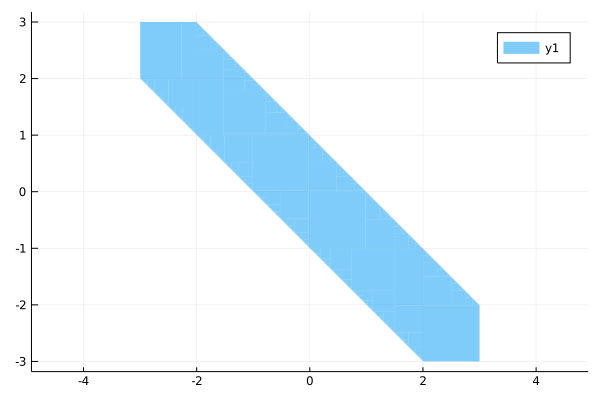

In [54]:
plot(p.inner, ratio=1, lw=0)

In [55]:
p.inner

1415-element Array{IntervalBox{2,Float64},1}:
 [1.98727, 1.99557] × [-1.004, -0.995569]
 [1.9708, 1.98728] × [-1.004, -0.987271]
 [1.9708, 1.97898] × [-0.987272, -0.978973]
 [1.93812, 1.97081] × [-1.004, -0.970804]
 [1.95433, 1.96251] × [-0.970805, -0.962507]
 [1.93812, 1.95434] × [-0.970805, -0.954338]
 [1.93812, 1.94617] × [-0.954339, -0.946169]
 [1.87327, 1.93813] × [-1.004, -0.938126]
 [1.92165, 1.92983] × [-0.938127, -0.929828]
 [1.90544, 1.92166] × [-0.938127, -0.921659]
 [1.90544, 1.9135] × [-0.92166, -0.91349]
 [1.87327, 1.90545] × [-0.938127, -0.905448]
 [1.88923, 1.89728] × [-0.905449, -0.897279]
 ⋮
 [-1.88441, -1.87669] × [0.8844, 0.891986]
 [-1.89958, -1.89198] × [0.89957, 0.907038]
 [-1.92209, -1.90703] × [0.922089, 0.936908]
 [-1.91463, -1.90703] × [0.914622, 0.92209]
 [-1.92956, -1.92208] × [0.929556, 0.936908]
 [-1.96678, -1.9369] × [0.966778, 0.996186]
 [-1.95196, -1.9369] × [0.951959, 0.966779]
 [-1.9445, -1.9369] × [0.944492, 0.95196]
 [-1.95943, -1.95195] × [0.95942

In [56]:
C = @constraint x^2 + 2x + y^2 - 2y <= 1

Separator:
  - variables: x, y
  - expression: (x ^ 2 + 2x + y ^ 2) - 2y ∈ [-∞, 1]

In [57]:
X = IntervalBox(-10..10, 2)

[-10, 10] × [-10, 10]

In [58]:
p = pave(C, X, 0.1)

Paving:
- tolerance ϵ = 0.1
- inner approx. of length 445
- boundary approx. of length 292

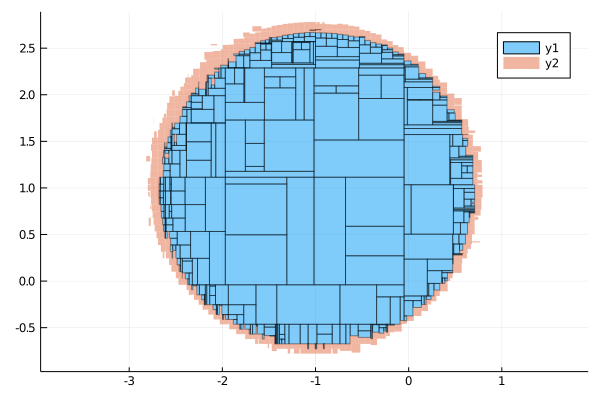

In [59]:
plot(p.inner, lw=1, ratio=1)
plot!(p.boundary, lw=0, ratio=1)

In [60]:
X = IntervalBox(-10..10, 2)

[-10, 10] × [-10, 10]

In [61]:
C(X)

([-6.40313, 6.40313] × [-6.40313, 6.40313], [-10, 10] × [-10, 10])

In [62]:
C = @constraint x + y == 1

Separator:
  - variables: x, y
  - expression: x + y ∈ [1, 1]

In [63]:
X = IntervalBox(-5..5, 2)

[-5, 5] × [-5, 5]

In [64]:
p = pave(C, X, 0.01)

Paving:
- tolerance ϵ = 0.01
- inner approx. of length 0
- boundary approx. of length 1024

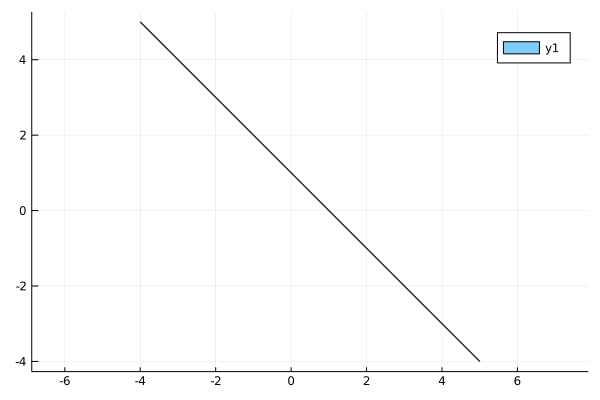

In [65]:
plot(p.boundary, ratio=1)

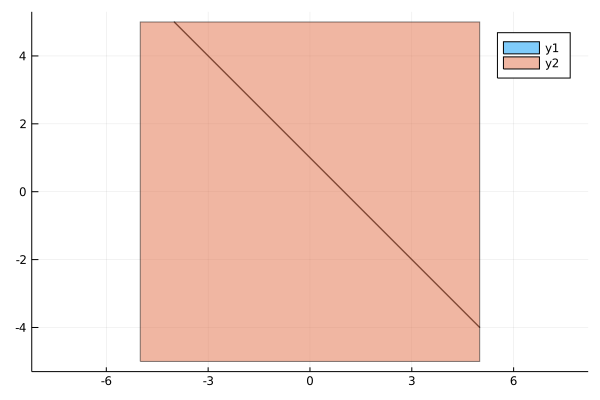

In [66]:
plot!(X)

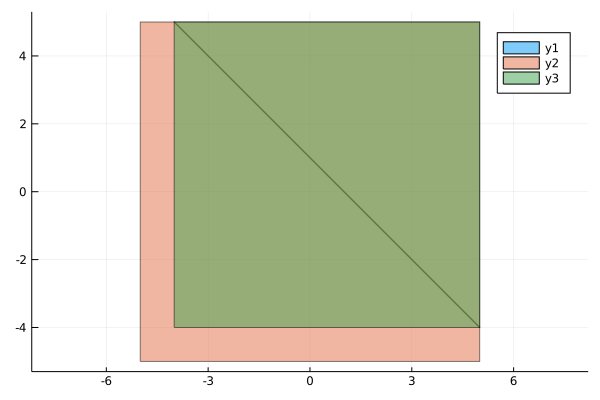

In [67]:
plot!(C(X)[1])

In [68]:
Base.remove_linenums!(C.contractor.forward.code)

quote
    t->begin
            (x, y) = t
            begin
                _o = x + y
            end
            return (_o, ())
        end
end

In [69]:
Base.remove_linenums!(C.contractor.backward.code)

quote
    (t1, t2, t3)->begin
            (x, y) = t1
            (_o,) = t2
            () = t3
            begin
                (_o, x, y) = plus_rev(_o, x, y)
            end
            return (x, y)
        end
end

In [70]:
x = x ∩ (c - y)

[-∞, ∞]

In [71]:
A = -2..2
B = -1..1

[-1, 1]

In [72]:
A - B

[-3, 3]

In [73]:
X = -10..10

[-10, 10]

In [74]:
setdiff(X, setdiff(X, A) .+ B)

LoadError: MethodError: no method matching Float64(::Interval{Float64})
Closest candidates are:
  Float64(::Real, !Matched::RoundingMode) where T<:AbstractFloat at rounding.jl:200
  Float64(::T) where T<:Number at boot.jl:716
  Float64(!Matched::UInt32) at float.jl:66
  ...

In [75]:
cancelminus(A, B)

[-1, 1]

In [76]:
C = @constraint 1 <= x + y <= 2

Separator:
  - variables: x, y
  - expression: x + y ∈ [1, 2]

In [77]:
X = IntervalBox(1..3, -2..7)

[1, 3] × [-2, 7]

In [78]:
p = pave(C, X, 0.1)

Paving:
- tolerance ϵ = 0.1
- inner approx. of length 47
- boundary approx. of length 47

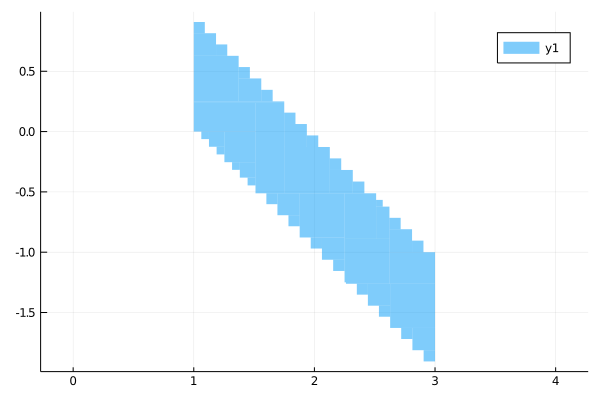

In [79]:
plot(p.inner, lw=0, ratio=1)

Invert the function $+$

Solve $x + y \in [a, b]$

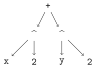

In [80]:
@tree x^2 + y^2

In [173]:
x = y = -10..10

[-10, 10]

In [174]:
a = x^2
b = y^2
c = a + b

constraint = 1..2

c′ = c ∩ constraint      

[1, 2]

In [175]:
typeof(a)

Interval{Float64}

In [176]:
a

[0, 100]

In [178]:
using ModelingToolkit
var = @variables aa bb

(aa, bb)

In [187]:
using BenchmarkTools

In [188]:
P = HPolytope([1 <= aa + bb, aa + bb <= 2,
               aa >= inf(a), aa <= sup(a),
               bb >= inf(b), bb <= sup(b)], var)

Ppoly = convert(HPolygon, P)

@btime ρ([1.0, 0.0], $P)

@btime ρ([1.0, 0.0], $Ppoly)

  11.806 μs (52 allocations: 4.11 KiB)
  89.188 ns (3 allocations: 208 bytes)


2.0

In [186]:
P = HPolytope([1 <= aa + bb, aa + bb <= 2,
               aa >= inf(a), aa <= sup(a),
               bb >= inf(b), bb <= sup(b)], var)

@show new_aplus = ρ([1.0, 0.0], P)
@show new_aplus = -ρ([-1.0, 0.0], P)

plot(P)

<!DOCTYPE html>
 
 
 Plots.jl

In [83]:
a

[0, 100]

In [84]:
C = @constraint 1 <= aa + bb <= 2

Separator:
  - variables: aa, bb
  - expression: aa + bb ∈ [1, 2]

In [85]:
C(a × b)

([0, 2] × [0, 2], [0, 100] × [0, 100])

In [86]:
p = pave(C, a × b)

Paving:
- tolerance ϵ = 0.01
- inner approx. of length 386
- boundary approx. of length 386

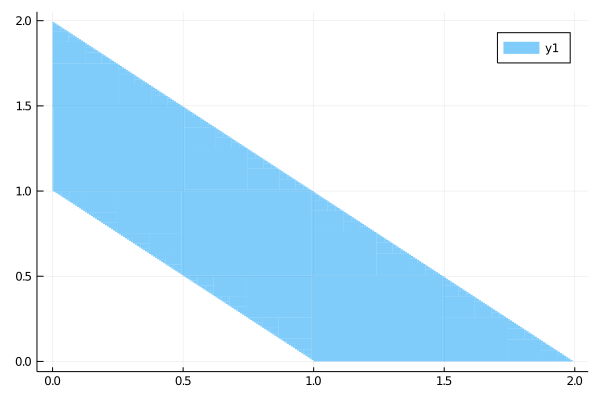

In [87]:
plot(p.inner, lw=0)

In [189]:
C1 = @constraint x + y == 1
C2 = @constraint x - y == 1

Separator:
  - variables: x, y
  - expression: x - y ∈ [1, 1]

In [190]:
X = IntervalBox(-5..5, 2)
p1 = pave(C1, X, 0.1)
p2 = pave(C2, X, 0.1)

Paving:
- tolerance ϵ = 0.1
- inner approx. of length 0
- boundary approx. of length 128

In [191]:
plot(p1.boundary)
plot!(p2.boundary, lw=0, ratio=1)

<!DOCTYPE html>
 
 
 Plots.jl

In [199]:
C1h = HPolytope([aa + bb <= 1.5, aa + bb >= 1, -10.0 <= aa, aa <= 10.0, -10 <= bb, bb <= 10], var)
C2h = HPolytope([aa - bb <= 1.5, aa - bb >= 1, -10.0 <= aa, aa <= 10.0, -10 <= bb, bb <= 10], var)

X = intersection(C1h, C2h)

plot(C1h, xlims=(-10.0, 10.0))
plot!(C2h)
plot!(X)
plot!(overapproximate(X, Hyperrectangle))

<!DOCTYPE html>
 
 
 Plots.jl

$$
\{H1, H2, ..., Hk\}
$$

In [204]:
Z = overapproximate(X, Zonotope, OctDirections(2))
plot!(Z)

<!DOCTYPE html>
 
 
 Plots.jl

$$
y(x^2 + x)
$$

In [210]:
Z

Zonotope{Float64,Array{Float64,1},Array{Float64,2}}([1.25, 0.0], [0.125 0.125 0.0 0.0; 0.125 -0.125 0.0 0.0])

In [214]:
Z.generators

2×4 Array{Float64,2}:
 0.125   0.125  0.0  0.0
 0.125  -0.125  0.0  0.0

In [212]:
Zint = Zonotope(Interval.(Z.center), Interval.(Z.generators))
d = [1.0, 0.0]
dint = Interval.(d)

@show ρ(d, Z) # = d^T c + ‖ d^T G ‖₁

@show ρ(dint, Zint)

ρ(d, Z) = 1.5
ρ(dint, Zint) = [1.5, 1.5]


[1.5, 1.5]

In [213]:
typeof(ρ(dint, Zint))

Interval{Float64}

In [198]:
cooverapproximate(X, Hyperrectangle)

4-element Array{HalfSpace{Float64,Array{Float64,1}},1}:
 HalfSpace{Float64,Array{Float64,1}}([1.0, 1.0], 1.5)
 HalfSpace{Float64,Array{Float64,1}}([-1.0, -1.0], -1.0)
 HalfSpace{Float64,Array{Float64,1}}([1.0, -1.0], 1.5)
 HalfSpace{Float64,Array{Float64,1}}([-1.0, 1.0], -1.0)

## Zonotope overapproximations

In [98]:
using LazySets
using IntervalArithmetic: Interval

In [99]:
plotly()

Plots.PlotlyBackend()

In [112]:
length(p.inner)

386

In [165]:
plot(p.inner, lw=0)

<!DOCTYPE html>
 
 
 Plots.jl

In [166]:
X = convert.(Hyperrectangle, p.inner) |> ConvexHullArray;

In [167]:
H = overapproximate(X, Hyperrectangle)
plot!(H)

<!DOCTYPE html>
 
 
 Plots.jl

In [148]:
ρ([1.0, 1.0], X) # 

2.0

$$
\rho(d, X) = \max_{x \in X} d^T x
$$

$Ax \leq b$

$$
\sigma(d, X) = \{x \in \mathbb{R}^n : d^T x = \rho(d, X)\}
$$

$$
\tilde{X} := \bigcap_d \left( d^T x \leq \rho(d, X) \right)
$$

In [150]:
@show a = σ([1.0, 1.0], X)

Xu = convert.(Hyperrectangle, p.inner) |> UnionSetArray;
@show b = σ([1.0, 1.0], Xu)

a = σ([1.0, 1.0], X) = [1.9916856566432628, 0.008314343356737197]
b = σ([1.0, 1.0], Xu) = [1.9916856566432628, 0.008314343356737197]


2-element Array{Float64,1}:
 1.9916856566432628
 0.008314343356737197

In [154]:
@time overapproximate(X, HPolygon, 1e-3);

  0.000569 seconds (7.49 k allocations: 931.188 KiB)


In [155]:
H1 = rand(HalfSpace)
H2 = rand(HalfSpace)

P = HPolyhedron([H1, H2]) # a "CONCRETE" set

HPolyhedron{Float64,Array{Float64,1}}(HalfSpace{Float64,Array{Float64,1}}[HalfSpace{Float64,Array{Float64,1}}([0.5988013314828782, 0.7931627738976291], 0.5681695524435528), HalfSpace{Float64,Array{Float64,1}}([-1.12324171253722, 2.5371956940109373], -1.246787830900914)])

In [156]:
R = H1 ∩ H2 # this is what we call "LAZY INTERSECTION"

Intersection{Float64,HalfSpace{Float64,Array{Float64,1}},HalfSpace{Float64,Array{Float64,1}}}(HalfSpace{Float64,Array{Float64,1}}([0.5988013314828782, 0.7931627738976291], 0.5681695524435528), HalfSpace{Float64,Array{Float64,1}}([-1.12324171253722, 2.5371956940109373], -1.246787830900914), LazySets.IntersectionCache(-1))

In [160]:
@time ρ([1.0, 1.0], P)

  0.000061 seconds (35 allocations: 3.547 KiB)


Inf

In [ ]:
@time ρ([1.0, 1.0], R)

In [162]:
Z = rand(Zonotope)
@time ρ([1.0, 1.0], Z)

  0.000033 seconds (14 allocations: 800 bytes)


5.7848434943447575

In [121]:
plot!(X, lab="CH")
plot!(a)

<!DOCTYPE html>
 
 
 Plots.jl

In [122]:
@time Y = overapproximate(X, OctDirections(2));

  0.000063 seconds (86 allocations: 30.781 KiB)


In [169]:
Y.constraints

8-element Array{HalfSpace{Float64,SparseArrays.SparseVector{Float64,Int64}},1}:
 HalfSpace{Float64,SparseArrays.SparseVector{Float64,Int64}}(  [1]  =  1.0
  [2]  =  1.0, 2.0)
 HalfSpace{Float64,SparseArrays.SparseVector{Float64,Int64}}(  [1]  =  1.0
  [2]  =  -1.0, 1.9916856566432628)
 HalfSpace{Float64,SparseArrays.SparseVector{Float64,Int64}}(  [1]  =  -1.0
  [2]  =  1.0, 1.992340538739418)
 HalfSpace{Float64,SparseArrays.SparseVector{Float64,Int64}}(  [1]  =  -1.0
  [2]  =  -1.0, -0.9999999999999999)
 HalfSpace{Float64,SparseArrays.SparseVector{Float64,Int64}}(  [1]  =  1.0, 1.9916856566432628)
 HalfSpace{Float64,SparseArrays.SparseVector{Float64,Int64}}(  [2]  =  1.0, 1.992340538739418)
 HalfSpace{Float64,SparseArrays.SparseVector{Float64,Int64}}(  [2]  =  -1.0, 0.0)
 HalfSpace{Float64,SparseArrays.SparseVector{Float64,Int64}}(  [1]  =  -1.0, 0.0)

In [123]:
plot!(Y, lab="Y")

<!DOCTYPE html>
 
 
 Plots.jl

In [124]:
@time Z = overapproximate(Y, Zonotope, OctDirections(2));

  0.000429 seconds (867 allocations: 58.156 KiB)


In [125]:
plot!(Z, lab="Z")

<!DOCTYPE html>
 
 
 Plots.jl

In [129]:
order(Z)

2//1

In [145]:
ZS = split(Z, [1, 2, 3, 4], [2,2,2,2])
plot(ZS)

<!DOCTYPE html>
 
 
 Plots.jl

In [146]:
ZSn = filter(x -> !isdisjoint(x, Y), ZS);

In [147]:
plot(ZSn, lab="", colo="green")
plot!(Z, lab="Z", alpha=.1)
plot!(Y, lab="Y", color="red")

<!DOCTYPE html>
 
 
 Plots.jl